# 0.) Import and Clean data

In [36]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [38]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [39]:
df = pd.read_csv("/content/gdrive/MyDrive/bank-additional.csv", sep=";")

In [40]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [41]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [42]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [43]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

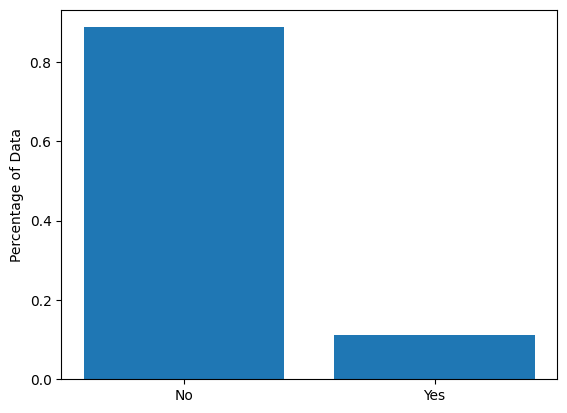

In [44]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [45]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_scaled, y_train)



# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [47]:
dtree_main = DecisionTreeClassifier(max_depth = 3)
dtree_main.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.165\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.491\ngini = 0.299\nsamples = 20023\nvalue = [16367, 3656]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.114\nsamples = 10601\nvalue = [9959, 642]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.097\nsamples = 10397\nvalue = [9868, 529]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.494\nsamples = 204\nvalue = [91, 113]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.322\ngini = 0.435\nsamples = 9422\nvalue = [6408, 3014]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.489\nsamples = 6860\nvalue = [3934, 2926]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.066\nsamples = 2562\nvalue = [2474, 88]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.321\ngini = 0.417\nsamples = 31137\nvalue = [9213, 21924]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.827\ngini = 0.337\nsamples = 25616\nvalue = [5490, 20126]\nclass 

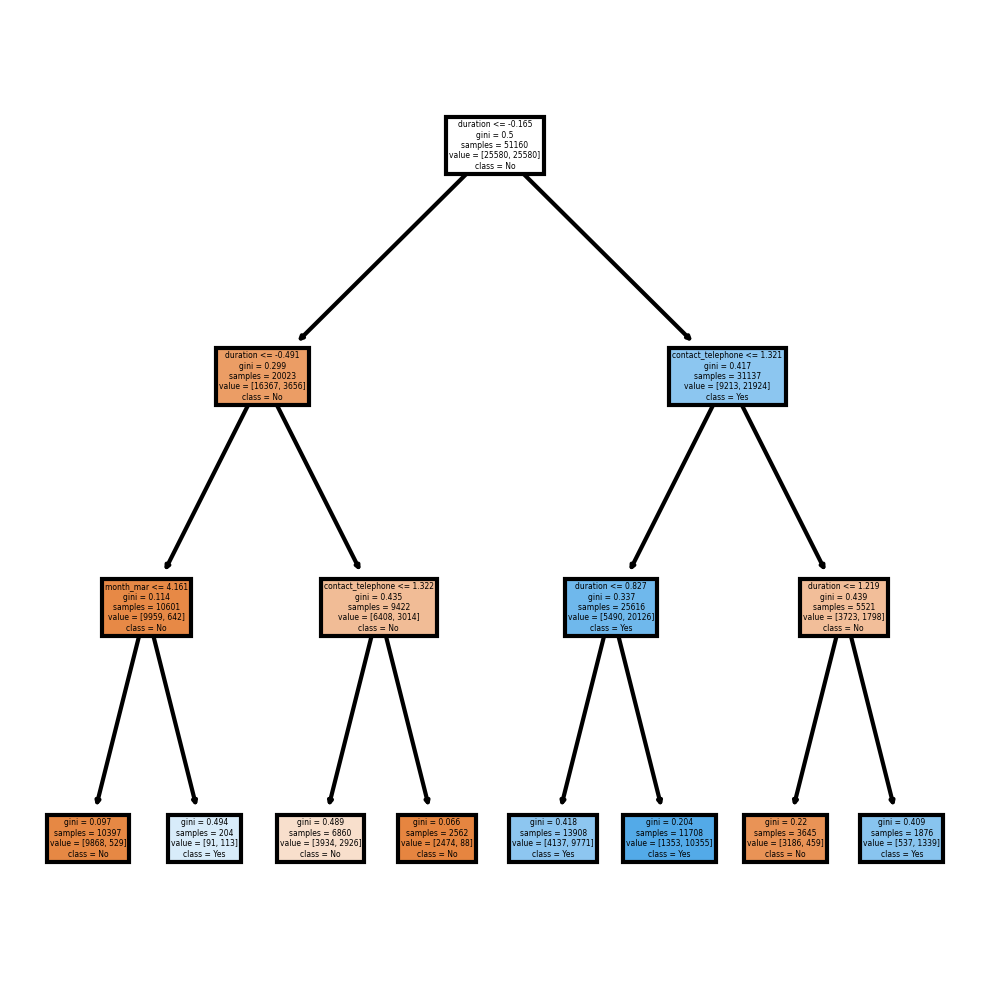

In [48]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree_main, filled = True, feature_names = X.columns, class_names=["No","Yes"])

#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [49]:
y_pred = dtree_main.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

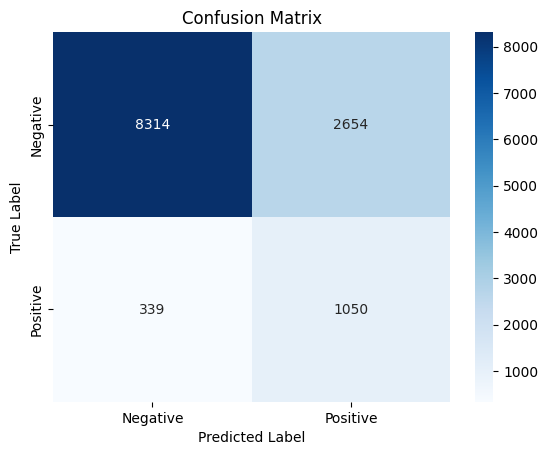

In [50]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

In [51]:

dtree = DecisionTreeClassifier(max_depth =3)

In [52]:
bagging = BaggingClassifier(estimator = dtree,
                  n_estimators = 100,
                  max_samples = .5,
                  max_features = 1.)


In [53]:
bagging.fit(X_train_smote, y_train_smote)

y_pred = bagging.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

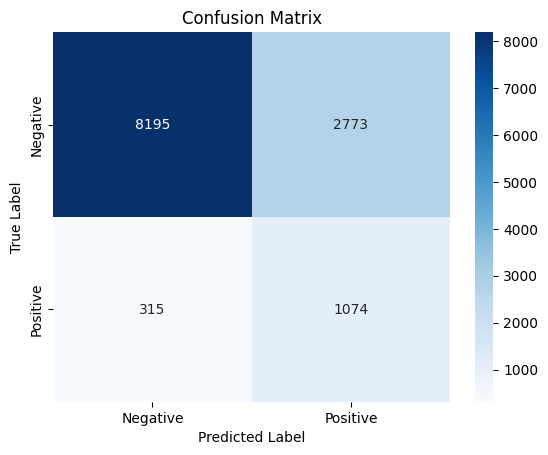

In [56]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# 4.) Boost your tree

In [57]:
from sklearn.ensemble import AdaBoostClassifier

In [58]:

dtree = DecisionTreeClassifier(max_depth =3)

In [59]:
boost = AdaBoostClassifier(estimator = dtree,
                           n_estimators = 100,
                           learning_rate = .1)

In [60]:
boost.fit(X_train_smote, y_train_smote)

y_pred = boost.predict(X_test)

y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


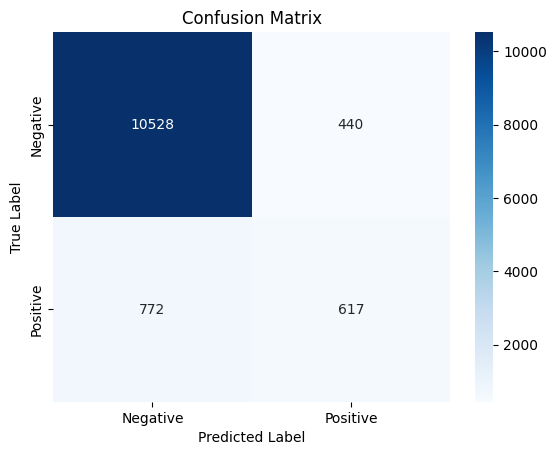

In [61]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 4 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [62]:
pip install mlens

In [63]:
from sklearn.linear_model import LogisticRegression

In [65]:
base_predictions = [list(dtree_main.predict(X_train_smote)),
                   boost.predict(X_train_smote),
                   bagging.predict(X_train_smote)]

In [66]:
n = len(base_predictions[0])

In [67]:
base_predictions = [np.array(base_predictions)[:,i] for i in range(n)]

In [68]:
super_learner = LogisticRegression()

In [69]:
super_learner.fit(base_predictions, y_train_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [70]:
super_learner.coef_

array([[0.22146434, 5.08484751, 1.20047373]])

Coefficient for the first base learner (0.22146434): This value suggests that the predictions from the first base learner have a positive, but relatively small influence on the final prediction of the super learner. It contributes to the final prediction, but not as strongly as the other models.

Coefficient for the second base learner (5.08484751): This is a large positive coefficient, which means that the predictions from the second base learner have a substantial positive influence on the final prediction of the super learner. The model heavily relies on the predictions of this base learner.

Coefficient for the third base learner (1.20047373): This coefficient is positive and indicates a moderate influence on the final prediction. It's smaller than the coefficient for the second base learner but still significant.

These coefficients are part of the logistic regression model that combines the predictions of the base learners. A positive coefficient in a logistic regression model indicates that as the prediction from the corresponding base learner increases, the log odds of the target variable being 1 (assuming a binary classification with 0 and 1 as outcomes) increase, making it more likely for the final prediction to be 1.